# Pymaceuticals Inc.
---

### Analysis

 - The box plot comparing final tumor volumes across four treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin) shows that Capomulin and Ramicane have significantly lower median tumor volumes compared to Infubinol and Ceftamin. Additionally, Infubinol and Ceftamin have greater interquartile ranges, suggesting more variability in tumor size outcomes. Infubinol also has an outlier, indicating at least one mouse had a tumor volume much lower than the rest of the group.

 - In the line plot showing tumor volume over time for mouse I509 treated with Capomulin, the tumor volume starts at around 45 mm³ and increases steadily to approximately 48 mm³ by day 20, indicating initial growth. After day 20, the tumor volume declines sharply to about 41 mm³ by day 30. Post-decline, the volume increases slightly after day 40, rising from 40 mm³ to about 42 mm³.

 - The scatter plot and linear regression analysis of mouse weight vs. average tumor volume for the Capomulin regimen show a strong positive correlation between mouse weight and tumor volume. This suggests that as the mouse weight increases, the tumor volume also tends to increase.
 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
single_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")
# Display the data table for preview
single_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice.
unique_count = single_df["Mouse ID"].nunique()
unique_count

249

In [48]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = single_df[single_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
# Display the duplicate rows
duplicate_mice["Mouse ID"]

107     g989
137     g989
329     g989
360     g989
620     g989
681     g989
815     g989
869     g989
950     g989
1111    g989
Name: Mouse ID, dtype: object

In [56]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()

# Filter the original single_df to get all rows for those duplicate 'Mouse ID's
duplicate_mice_data = single_df[single_df["Mouse ID"].isin(duplicate_mouse_ids)]
duplicate_mice_data 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [57]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Drop duplicates by 'Mouse ID', keeping the first instance

# Filter out the specific mouse ID
clean_df = single_df[single_df["Mouse ID"] != "g989"]

# Drop duplicates based on 'Mouse ID' and 'Timepoint', keeping only the first occurrence.
clean_df = clean_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")

# Display the cleaned DataFrame
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [58]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
grouped = single_df.groupby('Drug Regimen')

# Declare lists to hold the results
regimens = []
means = []
medians = []
variances = []
std_devs = []
sems = []

# Loop through each group (regimen) and manually calculate the statistics
for regimen, group in grouped:
    regimens.append(regimen)
    
    # Extract the 'Tumor Volume (mm3)' series for the current regimen
    tumor_volumes = group['Tumor Volume (mm3)']
    
    # Calculate mean, median, variance, standard deviation, and SEM of the tumor volume.
    mean_value = tumor_volumes.mean()
    median_value = tumor_volumes.median()
    variance_value = tumor_volumes.var()
    std_dev_value = tumor_volumes.std()
    sem_value = std_dev_value / (len(tumor_volumes) ** 0.5)
    
    # Append the statistics to each of the lists
    means.append(mean_value)
    medians.append(median_value)
    variances.append(variance_value)
    std_devs.append(std_dev_value)
    sems.append(sem_value)

# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame({
    'Drug Regimen': regimens,
    'Mean Tumor Volume': means,
    'Median Tumor Volume': medians,
    'Tumor Volume Variance': variances,
    'Tumor Volume Std. Dev.': std_devs,
    'Tumor Volume Std. Err.': sems
})

# Display the summary statistics
summary_stats_df.set_index('Drug Regimen')



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Summary Statistics

In [60]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats = single_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem=lambda x: x.std() / (len(x) ** 0.5)
).reset_index()
# Using the aggregation method, produce the same summary statistics in a single line
# Display summary statistics table
summary_stats.set_index('Drug Regimen')

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

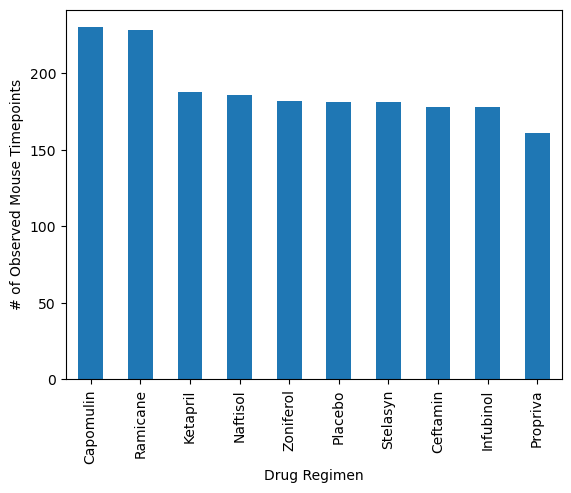

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group by 'Drug Regimen' and count the number of rows (Mouse ID/Timepoints) for each regimen
regimen_counts = single_df.groupby('Drug Regimen').size()
# Sort the counts in ascending order
sorted_regimen_counts = regimen_counts.sort_values(ascending=False)
# Plot the bar chart
# Create the bar chart using pandas
sorted_regimen_counts.plot.bar(
    xlabel='Drug Regimen',
    ylabel='# of Observed Mouse Timepoints'
)


# Display the plot
plt.show()

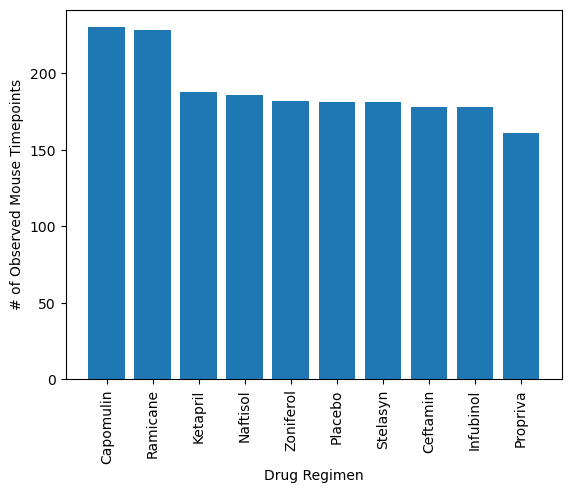

In [69]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Create a bar plot using pyplot

# Sort the counts in descending order
sorted_regimen_counts = regimen_counts.sort_values(ascending=False)

# Create the bar plot using pyplot
plt.bar(sorted_regimen_counts.index, sorted_regimen_counts.values)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate x-axis labels for better readability (if necessary)
plt.xticks(rotation=90)

# Display the plot
plt.show()

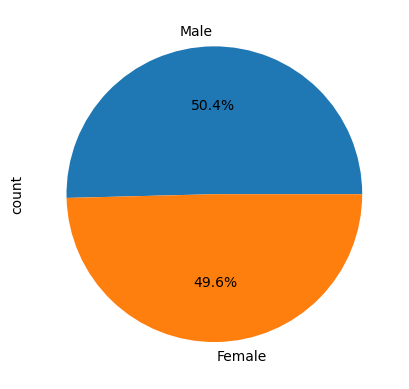

In [70]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Drop duplicates to get unique Mouse ID and corresponding gender
# Filter out the specific mouse ID
clean_df = single_df[single_df["Mouse ID"] != "g989"]

# Drop duplicates based on 'Mouse ID' and 'Timepoint', keeping only the first occurrence.
clean_df = clean_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
unique_mice = clean_df[['Mouse ID', 'Sex']].drop_duplicates()

# Generate a pie chart showing the distribution of unique male versus female mice
# Count the number of male and female mice
gender_counts = unique_mice['Sex'].value_counts()

# Plot the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', labels=['Male', 'Female'])
# Make the pie chart
plt.show()




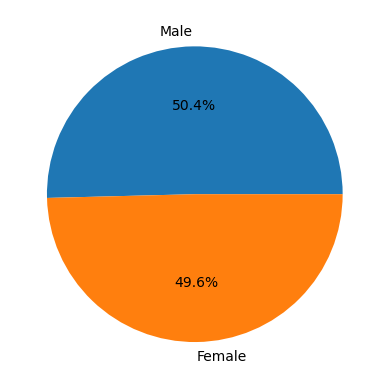

In [71]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Plot the pie chart using pyplot
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [72]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = single_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(single_df, on=['Mouse ID', 'Timepoint'], how="left")

# Display the final DataFrame with tumor volumes at the last timepoint
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [73]:
# Put treatments into a list for for loop (and later for plot labels)
# Create list of unique treatments
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Empty list to store tumor volume data
tumor_vol_list = []

# Dictionary to store outliers
outlier_dict = {}

# Loop over each treatment in the list
for treatment in treatment_list:
    # Filter data for the current treatment
    treatment_df = merged_data[merged_data['Drug Regimen'] == treatment]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume_data = treatment_df['Tumor Volume (mm3)']
    tumor_vol_list.append(tumor_volume_data)
    
    # Calculate IQR
    quartiles = tumor_volume_data.quantile([.25, .5, .75])
    IQR = quartiles[0.75] - quartiles[0.25]
    
    # Determine bounds for outliers
    lower_bound = quartiles[0.25] - (1.5 * IQR)
    upper_bound = quartiles[0.75] + (1.5 * IQR)
    
    # Identify potential outliers
    outliers = tumor_volume_data[(tumor_volume_data < lower_bound) | (tumor_volume_data > upper_bound)]
    
    # Store outliers for this treatment
    outlier_dict[treatment] = outliers.tolist()

    # Print outliers
    print(f"{treatment}'s potential outliers: {outliers}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


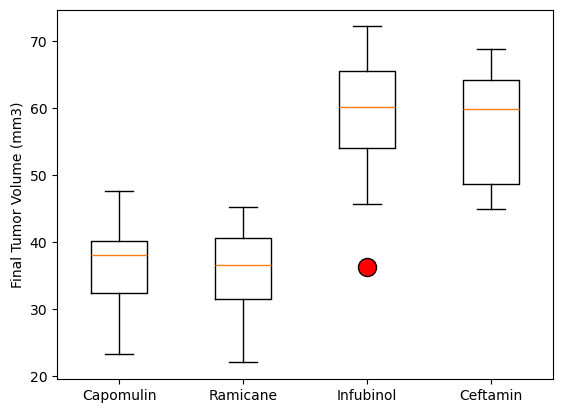

In [74]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


# Create the box plot
plt.boxplot(tumor_vol_list, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'],
            flierprops=dict(markerfacecolor='r', marker='o', markersize=13)) 
# Customizing outliers as red circles

# Add side label
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()


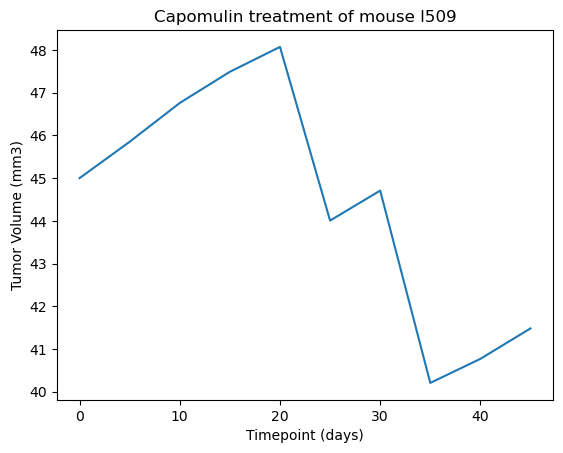

In [75]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Replace with the ID of the mouse you're interested in
mouse_id = 'l509'  
# Filter the data for a specific mouse treated with Capomulin
capomulin_mouse_df = single_df[(single_df['Mouse ID'] == mouse_id) & (single_df['Drug Regimen'] == 'Capomulin')]

# Create a line plot for Tumor Volume vs. Timepoint
plt.plot(capomulin_mouse_df['Timepoint'], capomulin_mouse_df['Tumor Volume (mm3)'])

# Add labels and title
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

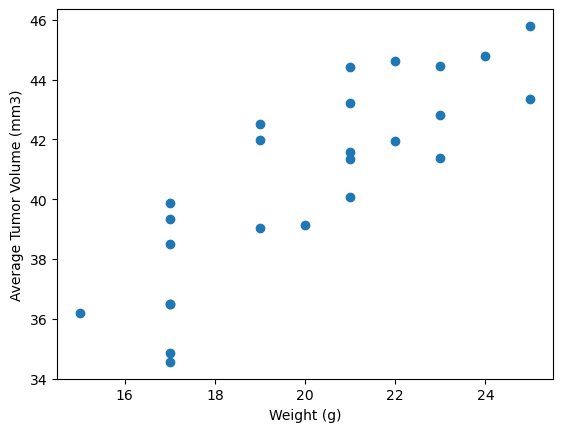

In [76]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for Capomulin regimen
capomulin_df = single_df[single_df['Drug Regimen'] == 'Capomulin']

# Group by 'Mouse ID' and calculate the average tumor volume for each mouse
avg_tumor_vol = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Extract mouse weight (taking the first weight value for each mouse since it doesn't change)
mouse_weight = capomulin_df.groupby('Mouse ID').first()['Weight (g)']

# Create the scatter plot
plt.scatter(mouse_weight, avg_tumor_vol)

# Add labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display plot
plt.show()


## Correlation and Regression

In [77]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = np.corrcoef(mouse_weight, avg_tumor_vol)[0, 1]
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

The correlation between mouse weight and the average tumor volume is 0.84


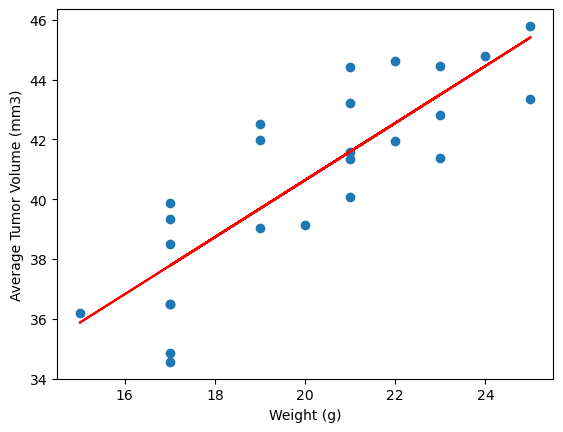

In [78]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for Capomulin regimen
capomulin_df = single_df[single_df['Drug Regimen'] == 'Capomulin']

# Group by 'Mouse ID' and calculate the average tumor volume for each mouse
avg_tumor_vol = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Extract mouse weight (taking the first weight value for each mouse since it doesn't change)
mouse_weight = capomulin_df.groupby('Mouse ID').first()['Weight (g)']



# Declare linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, avg_tumor_vol)

# Create the scatter plot
plt.scatter(mouse_weight, avg_tumor_vol)
# Plot the linear regression line
regression_values = slope * mouse_weight + intercept
plt.plot(mouse_weight, regression_values, color='r', label=f'Linear regression line')
# Add labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display plot
plt.show()